# My Notebook
This is a Jupyter Notebook for in progress work that I am doing that I have not extracted into the right places yet or made permanent in my repo.

In [1]:
# Imports
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Analysing GCRO Data

In [2]:
# CONSTANTS

# Data file paths
GCRO_2021 = './data/gcro-2021.dta'
GCRO_2018 = './data/gcro-2018.dta'
GCRO_2015 = './data/gcro-2015.dta'
df_gcro_2021 = pd.read_stata(GCRO_2021, convert_categoricals=False)
df_gcro_2018 = pd.read_stata(GCRO_2018, convert_categoricals=False)
df_gcro_2015 = pd.read_stata(GCRO_2015, convert_categoricals=False)
df_gcro_2021.head()


,unique_id,interview_date,Date_month,District_municipality,municipality_coded,Planning_region,Planning_region_code,ward_code,ea_code,adult_count,...,F1servic,F2soclas,F3govsat,F4lifsat,F5health,F6safety,F7partic,QoLIndex_Data_Driven,HH_WEIGHT,DOWNSCALE_MUN_PP_BENCHWGT
0,0002c645-1eda-4740-a065-0f40a24c0eaa,2021-02-20,5,1,1,Ekurhuleni_A,EKU_A,79700036,79710758,4,...,10.000000,7.795356,6.465669,7.500000,7.350730,5.580920,10.000000,79.555756,516.784167,1.228062
1,0006144d-bc67-479e-8482-37bd84c42233,2021-01-15,4,5,7,Merafong City,GT484,74804018,76610311,3,...,10.000000,7.765167,4.024354,3.667370,10.000000,4.064736,6.709857,70.034147,71.698750,0.208980
2,00151a00-e290-4ed7-ad05-9159e200ba48,2020-11-20,2,2,2,Johannesburg_D,JHB_D,79800043,79813663,3,...,8.564746,2.962554,4.851819,3.181259,10.000000,3.795571,2.535863,55.429275,475.072713,1.529085
3,00166da5-86bd-4628-bb60-2c1d6a6e66bd,2020-11-10,2,5,8,Mogale City,GT481,74801012,76310192,1,...,10.000000,3.195065,3.559272,5.840366,10.000000,8.143101,2.535863,64.974098,104.777569,0.235093
4,001ae7eb-a39b-4268-9f63-0588fa71b6e9,2020-11-05,2,2,2,Johannesburg_D,JHB_D,79800037,79810807,1,...,0.000000,2.578229,2.244718,0.000000,6.025358,1.652470,2.535863,19.383139,798.882790,1.250373


In [15]:
print(f'Household count GCRO 2021 = {len(df_gcro_2021)}')
print(f'Household count GCRO 2018 = {len(df_gcro_2018)}')
print(f'Household count GCRO 2015 = {len(df_gcro_2015)}')


Household count GCRO 2021 = 13616
Household count GCRO 2018 = 24889
Household count GCRO 2015 = 30002


In [31]:
# Households for Gauteng
dhs_2016 = 1252
ghs_2021 = 1799
ghs_2020 = 1974
ghs_2019 = 15455
ghs_2018 = 4996
ghs_2017 = 5089
gcro_2021 = len(df_gcro_2021)
gcro_2018 = len(df_gcro_2018)
gcro_2015 = len(df_gcro_2015)

GAUTENG_KM = 18176

households_km = {
    'DHS 2016': dhs_2016 / GAUTENG_KM,
    'GHS 2021': ghs_2021 / GAUTENG_KM,
    'GHS 2020': ghs_2020 / GAUTENG_KM,
    'GHS 2019': ghs_2019 / GAUTENG_KM,
    'GHS 2018': ghs_2018 / GAUTENG_KM,
    'GHS 2017': ghs_2017 / GAUTENG_KM,
    'GCRO 2021': gcro_2021 / GAUTENG_KM,
    'GCRO 2018': gcro_2018 / GAUTENG_KM,
    'GCRO 2015': gcro_2015 / GAUTENG_KM,
}

for i in households_km:
    print(f'Households per km^2 {i} = {households_km[i]}')



Households per km^2 DHS 2016 = 0.06888204225352113
Households per km^2 GHS 2021 = 0.09897667253521127
Households per km^2 GHS 2020 = 0.10860475352112677
Households per km^2 GHS 2019 = 0.8502970950704225
Households per km^2 GHS 2018 = 0.2748679577464789
Households per km^2 GHS 2017 = 0.27998459507042256
Households per km^2 GCRO 2021 = 0.7491197183098591
Households per km^2 GCRO 2018 = 1.3693331866197183
Households per km^2 GCRO 2015 = 1.650638204225352


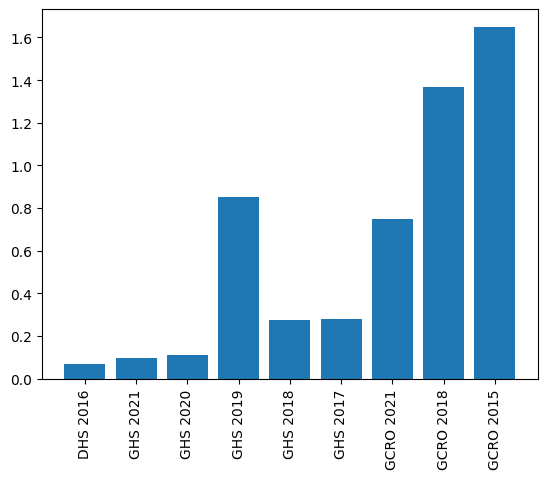

In [32]:
# Histogram
fig, ax = plt.subplots()
names = list(households_km.keys())
values = list(households_km.values())

ax.bar(names, values)
plt.xticks(rotation=90)
plt.show()

In [9]:
# EA Code Clusters
ea_code_clusters = df_gcro_2021.groupby(['ea_code']).count()

print(f'EA Code Clusters GCRO 2021 = {len(ea_code_clusters)}')

EA Code Clusters GCRO 2021 = 3118


In [9]:
# Ward Code Clusters
ward_code_clusters = df_gcro_2021.groupby(['ward_code']).count()

print(f'Ward Code Clusters GCRO 2021 = {len(ward_code_clusters)}')

Ward Code Clusters GCRO 2021 = 529


In [15]:
# Planning Regions Clusters
planning_region_clusters = df_gcro_2021.groupby(['Planning_region_code']).count()

print(f'Planning Region Clusters GCRO 2021 = {len(planning_region_clusters)}')

Planning Region Clusters GCRO 2021 = 26


In [18]:
# Municipality Clusters
municipality_clusters = df_gcro_2021.groupby(['municipality_coded']).count()

print(f'Municipality Clusters GCRO 2021 = {len(municipality_clusters)}')

Municipality Clusters GCRO 2021 = 9


In [16]:
# District municipality Clusters
district_clusters = df_gcro_2021.groupby(['District_municipality']).count()

print(f'District municipality Clusters GCRO 2021 = {len(district_clusters)}')

District municipality Clusters GCRO 2021 = 5


In [10]:
# Households per ward cluster
a = len(df_gcro_2021) / len(ward_code_clusters)

print(f'Households per cluster GCRO 2021 = {a}')

Households per cluster GCRO 2021 = 25.73913043478261


In [ ]:
# By region (per data set)
# There are 5 regions (corresponds to GADM):
# City of Tshwane
# City of Johannesburg
# West Rand
# Ekurhuleni
# Sedibeng

# Analysis of 2021 Data
Taking a look at the sample design [here](https://cdn.gcro.ac.za/media/documents/2021.11.17_QoL_6_Sample_design.pdf).
![GCRO Sample Distribution 2021](./assets/gcro-sample-distribution-2021.png)

```R
# Aggregate household-level data to cluster level
cluster <- function(df, dhs = F){
  # Record how many households comprise each cluster
  for (i in 1:nrow(df)){
    sub <- subset(df, lat == df$lat[i] & lon == df$lon[i])
    df$n[i] <- nrow(sub)
  }
  # Clustering for LSMS survey data
  df <- if (dhs == FALSE)
    ddply(df, .(lat, lon), summarise,
          cons = mean(cons),
          nl = mean(nl),
          n = mean(n),
          sample = min(sample))
  # Clustering for DHS survey data
  else ddply(df, .(lat, lon), summarise,
             wealthscore = mean(wealthscore),
             nl = mean(nl),
             n = mean(n),
             sample = min(sample))
  return(df)
}
```


In [23]:
region_group_with_qol = df_gcro_2021.groupby(['Planning_region'])['QoLIndex_Data_Driven'].mean()
region_group_with_qol

Planning_region
Ekurhuleni_A      61.480495
Ekurhuleni_B      62.518654
Ekurhuleni_C      60.938414
Ekurhuleni_D      60.542533
Ekurhuleni_E      60.224523
Ekurhuleni_F      60.867347
Emfuleni          57.344270
Johannesburg_A    60.517315
Johannesburg_B    70.587468
Johannesburg_C    62.660253
Johannesburg_D    60.852875
Johannesburg_E    64.687781
Johannesburg_F    64.649536
Johannesburg_G    58.308128
Lesedi            61.698951
Merafong City     57.911275
Midvaal           63.860959
Mogale City       59.377321
Rand West         56.748319
Tshwane_1         62.248526
Tshwane_2         60.488300
Tshwane_3         64.108529
Tshwane_4         69.254629
Tshwane_5         56.304427
Tshwane_6         63.383513
Tshwane_7         57.581580
Name: QoLIndex_Data_Driven, dtype: float64

Joburg segment corresponds to table from doc:
![CoJ QoL](./assets/gcro-qol-city-of-joburg.png)

In [24]:
# This is what will likely be used to retrieve maps as it's what corresponds to the GADM DB
district_muni_with_qol = df_gcro_2021.groupby(['District_municipality'])['QoLIndex_Data_Driven'].mean()
district_muni_with_qol

District_municipality
1    61.197549
2    62.628624
3    63.195500
4    60.476952
5    58.065435
Name: QoLIndex_Data_Driven, dtype: float64